In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [151]:
# Load dataset
df = pd.read_csv(r"C:/Users/ganna/OneDrive/Desktop/gender_classification_v7.csv")

# Preview dataset
print("Dataset Preview:")
print(df.head())


Dataset Preview:
   long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female  


In [153]:
# Check for duplicates and missing values
print("Duplicate Rows:", df.duplicated().sum())
print("Missing Values:", df.isnull().sum())


Duplicate Rows: 1768
Missing Values: long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64


In [155]:
df = df.drop_duplicates()
print("Duplicates removed. Updated dataset size:", df.shape)

Duplicates removed. Updated dataset size: (3233, 8)


In [157]:
# Encode categorical variables (if any exist)
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


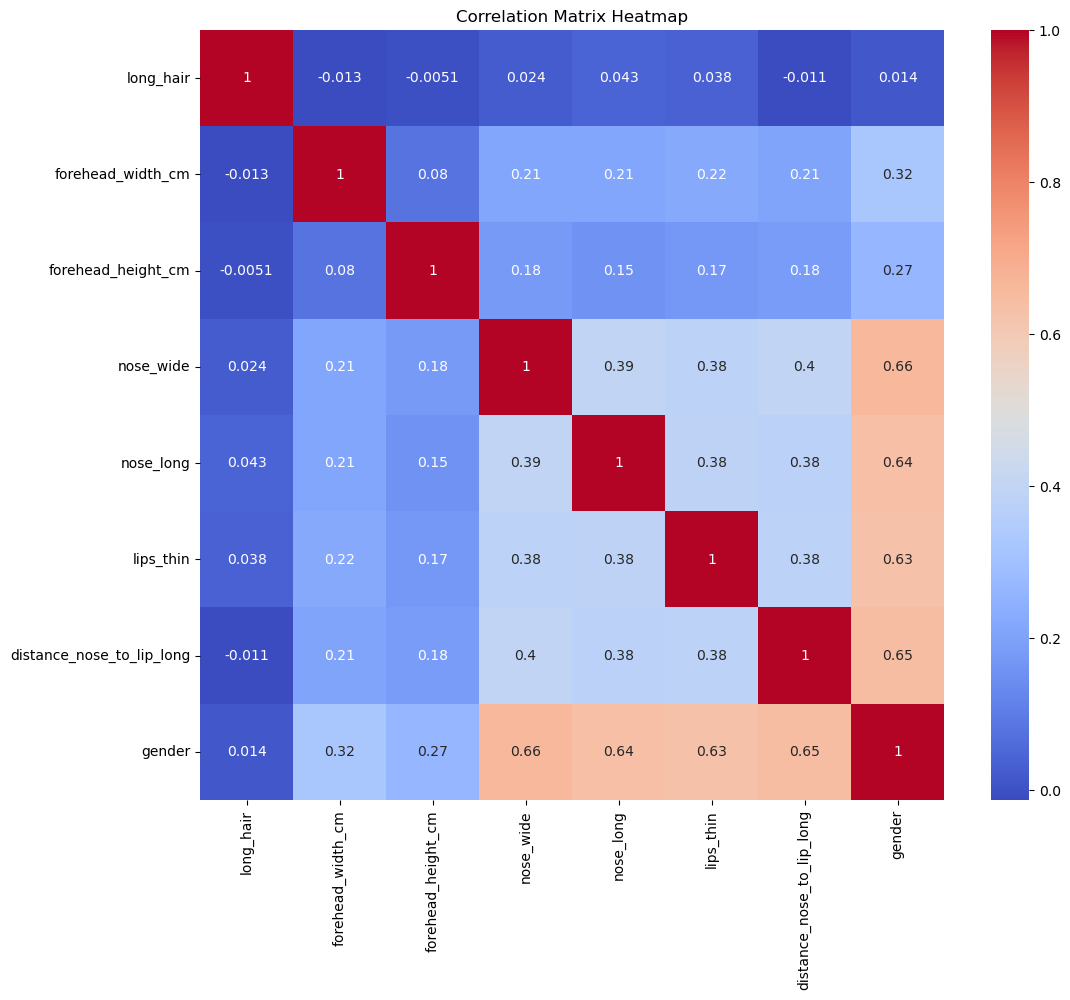

In [159]:
# Display correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


In [161]:
# Separate features (X) and target variable (Y)
X = df.drop('gender', axis=1)  # Change target variable to 'gender'
Y = df['gender']


In [163]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [165]:
# Scale numerical features before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [167]:
### Step 1: Apply PCA ###
pca = PCA(n_components=5)  # Choose 5 principal components based on variance analysis
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [169]:
### Step 2: Train Logistic Regression Model ###
lr_model = LogisticRegression(C=10.0, solver='liblinear', class_weight='balanced')
lr_model.fit(X_train_pca, Y_train)

# Predictions
Y_pred = lr_model.predict(X_test_pca)


In [ ]:
### Step 3: Model Evaluation ###
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, Y_pred))


Accuracy: 0.9613601236476044
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       308
           1       0.98      0.95      0.96       339

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



In [173]:
# Compute Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[300   8]
 [ 17 322]]


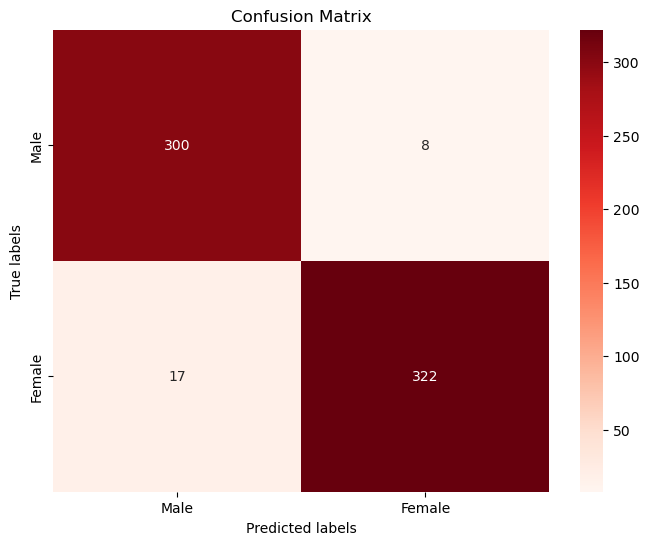

In [175]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Male', 'Female'],
            yticklabels=['Male', 'Female'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()